In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#Read CSV File which contains 3 columns : Period (In Month), Tourist count in Corse, Tourist Count in Bretagne

data = pd.read_csv("nights_tourist.csv", index_col = 0)

In [97]:
data.head()
#data.tail()

,stays_ile_france,stays_centre_val_loire,stays_bourgogne_franche_comte,stays_normandie,stays_haut_france,stays_grand_est,stays_pays_loire,stays_bretagne,stays_nouvelle_aquitaine,stays_occitanie,stays_auvergne_rhone _alpes,stays_provence_alpes_cote_azur,stays_corse
Période,,,,,,,,,,,,,
2018-05,2426.67,464.64,476.85,603.57,601.43,815.59,611.31,646.32,1217.16,1110.27,1356.11,1199.99,311.46
2018-04,2462.12,420.93,400.27,546.89,577.02,734.32,573.27,551.84,1091.46,955.46,1312.37,1107.88,156.78
2018-03,2671.91,342.79,414.30,445.37,524.85,699.66,469.12,476.93,962.14,796.92,1722.04,1027.02,42.67
2018-02,2276.45,274.76,340.01,361.79,442.51,597.22,394.33,375.33,709.13,679.61,1551.92,850.80,29.49
2018-01,2453.27,263.71,306.35,316.97,457.68,589.63,367.57,347.29,637.87,597.66,1271.09,754.81,24.82


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2018-05 to 2010-01
Data columns (total 13 columns):
stays_ile_france                  101 non-null float64
stays_centre_val_loire            101 non-null float64
stays_bourgogne_franche_comte     101 non-null float64
stays_normandie                   101 non-null float64
stays_haut_france                 101 non-null float64
stays_grand_est                   101 non-null float64
stays_pays_loire                  101 non-null float64
stays_bretagne                    101 non-null float64
stays_nouvelle_aquitaine          101 non-null float64
stays_occitanie                   101 non-null float64
stays_auvergne_rhone _alpes       101 non-null float64
stays_provence_alpes_cote_azur    101 non-null float64
stays_corse                       101 non-null float64
dtypes: float64(13)
memory usage: 11.0+ KB


In [102]:
#Moyenne-Ecart Type, Quartiles sur periode totale (8 ans)
data.describe()

,stays_ile_france,stays_centre_val_loire,stays_bourgogne_franche_comte,stays_normandie,stays_haut_france,stays_grand_est,stays_pays_loire,stays_bretagne,stays_nouvelle_aquitaine,stays_occitanie,stays_auvergne_rhone _alpes,stays_provence_alpes_cote_azur,stays_corse
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,2447.180792,368.107228,418.517327,484.975248,543.725545,749.357228,486.873762,514.346436,1068.346139,985.976634,1422.224455,1114.871782,184.479604
std,343.832892,81.727814,74.815010,111.007585,61.447624,108.514382,116.764913,151.546445,350.828425,365.350589,243.338346,357.523549,152.082904
min,1.700000,226.570000,281.220000,303.470000,404.150000,497.810000,309.110000,255.140000,555.970000,531.900000,920.710000,645.620000,22.780000
25%,2303.150000,279.950000,352.070000,375.380000,498.170000,675.530000,378.520000,380.740000,756.470000,650.010000,1252.070000,791.970000,36.170000
50%,2476.790000,380.390000,419.200000,501.460000,557.800000,795.640000,474.200000,520.090000,1087.840000,971.210000,1356.110000,1056.580000,145.940000
75%,2655.760000,436.760000,483.110000,571.240000,594.440000,832.960000,573.520000,616.700000,1248.390000,1177.700000,1577.420000,1300.310000,337.700000
max,2911.720000,519.820000,551.070000,687.550000,666.510000,928.050000,758.180000,877.860000,1887.680000,1897.470000,1937.750000,2017.050000,485.880000


In [107]:
#Filter by Region and save in dataframes
stays_ile_france = pd.Series(data.iloc[:,0])
stays_centre_val_loire = pd.Series(data.iloc[:,1])
stays_bourgogne_franche_comte= pd.Series(data.iloc[:,2])
stays_normandie = pd.Series(data.iloc[:,3])
stays_haut_france = pd.Series(data.iloc[:,4])
stays_grand_est = pd.Series(data.iloc[:,5])
stays_pays_loire = pd.Series(data.iloc[:,6])
stays_bretagne = pd.Series(data.iloc[:,7])
stays_nouvelle_aquitaine = pd.Series(data.iloc[:,8])
stays_occitanie = pd.Series(data.iloc[:,9])
stays_auvergne_rhone_alpes = pd.Series(data.iloc[:,10])
stays_provence_alpes_cote_azur = pd.Series(data.iloc[:,11])
stays_corse = pd.Series(data.iloc[:,12])

In [108]:
stays_ile_france.head()

Période
2018-05    2426.67
2018-04    2462.12
2018-03    2671.91
2018-02    2276.45
2018-01    2453.27
Name: stays_ile_france, dtype: float64

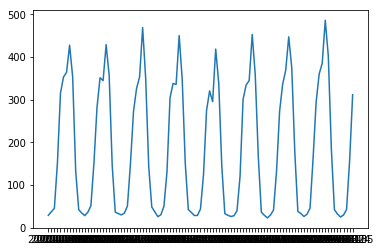

In [110]:
#Nightstands in Corse between 2010 and 2017
#Stationnary
plt.plot(stays_corse)

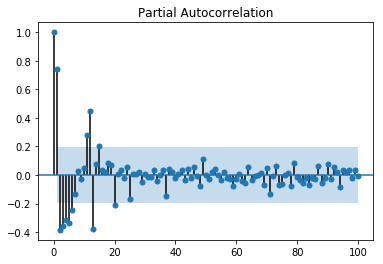

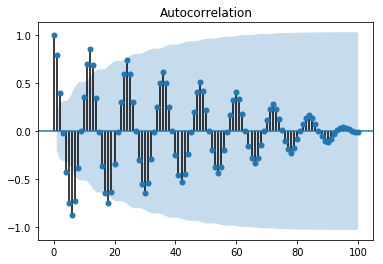

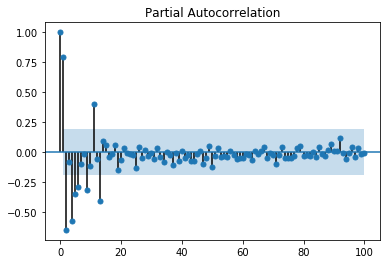

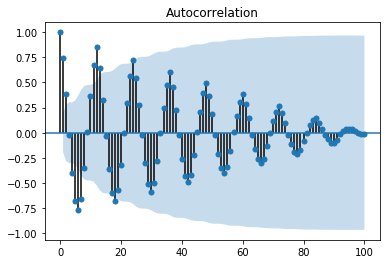

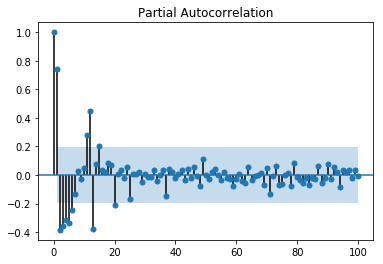

In [115]:
#Autocorrelation and Partial Autocorrelation Graph for Corse and Bretagne
plot_acf(stays_corse)
plot_pacf(stays_corse)
plot_acf(stays_bretagne)
plot_pacf(stays_bretagne)

/Users/Sekou/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Sekou/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/Sekou/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


                             ARIMA Model Results                              
Dep. Variable:          D.stays_corse   No. Observations:                  100
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -537.153
Method:                       css-mle   S.D. of innovations             49.347
Date:                Wed, 08 Aug 2018   AIC                           1088.305
Time:                        08:01:11   BIC                           1106.542
Sample:                    04-01-2018   HQIC                          1095.686
                         - 01-01-2010                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2539      0.657     -0.386      0.700      -1.541       1.034
ar.L1.D.stays_corse     1.6174      0.046     35.031      0.000       1.527       1.708
ar.L2.D.stays_co

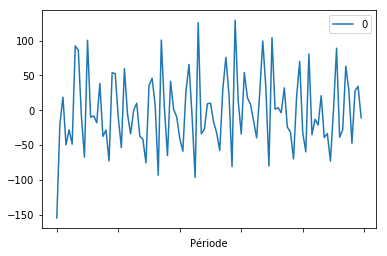

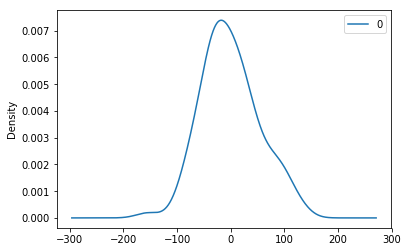

                0
count  100.000000
mean    -0.815872
std     53.381601
min   -154.426127
25%    -35.573513
50%     -8.158482
75%     30.539488
max    129.233758


In [125]:
##ARIMA Model Definition based on Partial and Auto Correlation Results
# We will use : 
model = ARIMA(stays_corse, order=(2,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/Users/Sekou/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Sekou/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/Sekou/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=113.352066, expected=48.340000
predicted=78.350176, expected=142.820000
predicted=212.145536, expected=349.090000
predicted=458.153904, expected=468.670000
predicted=481.161623, expected=353.360000
predicted=252.861965, expected=326.070000
predicted=344.046982, expected=272.310000
predicted=124.809461, expected=150.490000
predicted=50.894931, expected=50.520000
predicted=68.759901, expected=33.990000
predicted=49.661455, expected=29.810000
predicted=38.388144, expected=32.890000
predicted=85.917152, expected=36.440000
predicted=71.790494, expected=145.940000
predicted=225.328763, expected=356.370000
predicted=458.723327, expected=428.700000
predicted=410.734167, expected=344.360000
predicted=294.893196, expected=351.180000
predicted=357.261115, expected=281.100000
predicted=117.580101, expected=151.550000
predicted=79.079509, expected=51.260000
predicted=52.726101, expected=36.120000
predicted=39.955988, expected=28.150000
predicted=40.501866, expected=34.180000
predicted=95.

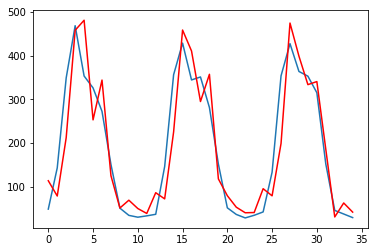

In [129]:
X = stays_corse.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error